## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [8]:
# TODO
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
data_hf = pd.read_csv(url)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


   **Obsahuje dataset chýbajúce hodnoty (NA) ? Dataset neobsahuje nijaké chýbajúce hodnoty.**

In [12]:
# TODO
data_hf.isnull().sum()
#Dataset neobsahuje nijaké chýbajúce hodnoty.


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age - float64
- anaemia - int64
- high_blood_pressure - int64
- serum_sodium - int64
- death_event - int64

In [11]:
# TODO
data_hf.dtypes
data_hf['DEATH_EVENT'].dtype

dtype('int64')

**Obsahuje dataset duplicitné záznamy? Neobsahuje duplicitné záznamy.**

In [14]:
# TODO
duplicates = data_hf.duplicated().sum()
print(f"Počet duplicitných záznamov: {duplicates}")
#Neobsahuje duplicitné záznamy.

Počet duplicitných záznamov: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [16]:
# TODO
data_hf['sex'].describe()

count    299.000000
mean       0.648829
std        0.478136
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

**Koľko záznamov mužov a žien obsahuje dataset?**

In [17]:
# TODO
sex_counts = data_hf['sex'].value_counts()
print(f"Počet mužov: {sex_counts[1]}, Počet žien: {sex_counts[0]}")

Počet mužov: 194, Počet žien: 105


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [18]:
# TODO
non_smokers = data_hf[data_hf['smoking'] == 0]['sex'].value_counts()
print(f"Počet nefajčiarov - Muži: {non_smokers[1]}, Ženy: {non_smokers[0]}")

Počet nefajčiarov - Muži: 102, Ženy: 101


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [24]:
# TODO
age_dtype = data_hf['age'].dtype
age_counts = data_hf['age'].count()
print(f"Dátový typ atribútu vek: {age_dtype}, počet hodnôt v datasete: {age_counts}")

Dátový typ atribútu vek: float64, počet hodnôt v datasete: 299


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [19]:
# TODO
min_age = data_hf['age'].min()
max_age = data_hf['age'].max()
mean_age = data_hf['age'].mean()
print(f"Minimálny vek: {min_age}, Maximálny vek: {max_age}, Priemerný vek: {mean_age:.2f}")

Minimálny vek: 40.0, Maximálny vek: 95.0, Priemerný vek: 60.83


**Z akého veku je v datasete najviac záznamov?**

In [20]:
# TODO
most_common_age = data_hf['age'].mode()[0]
print(f"Najčastejší vek v datasete: {most_common_age}")

Najčastejší vek v datasete: 60.0


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

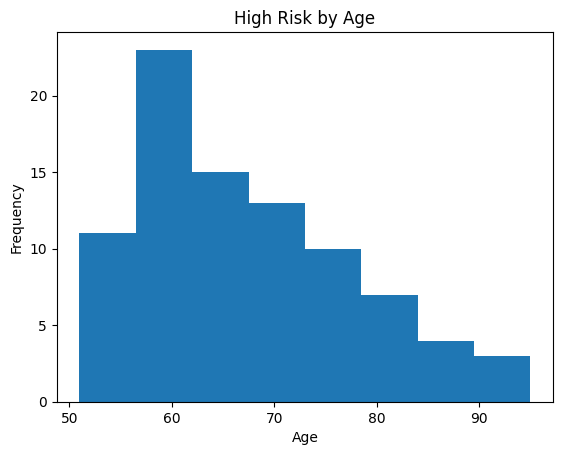

In [25]:
import matplotlib.pyplot as plt

data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

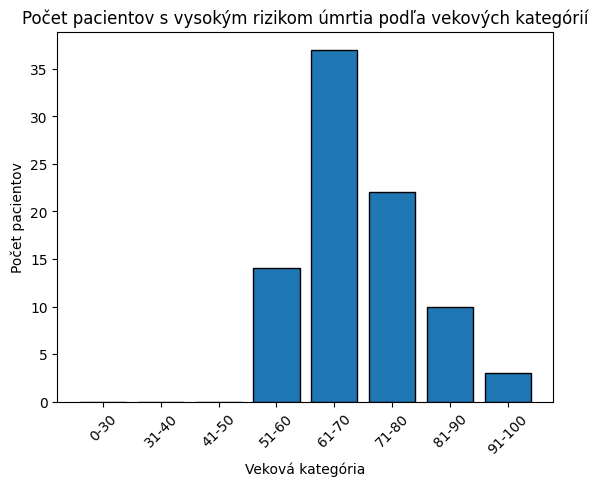

In [36]:
# TODO
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["0-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]
data_hf['age_category'] = pd.cut(data_hf['age'], bins=bins, labels=labels, right=False)

high_risk_counts = data_hf[data_hf['risk'] == 'High']['age_category'].value_counts().sort_index()

plt.bar(high_risk_counts.index, high_risk_counts.values, edgecolor='black')
plt.xlabel("Veková kategória")
plt.ylabel("Počet pacientov")
plt.title("Počet pacientov s vysokým rizikom úmrtia podľa vekových kategórií")
plt.xticks(rotation=45)
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [37]:
# TODO
most_risk_age = data_hf[data_hf['risk'] == 'High']['age'].mode()[0]
print(f"Vek s najväčším rizikom zlyhania srdca: {most_risk_age}")

Vek s najväčším rizikom zlyhania srdca: 60.0


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [38]:
# TODO
most_risk_age_category = pd.cut([most_risk_age], bins=bins, labels=labels, right=False)[0]
num_records_in_category = data_hf[data_hf['age_category'] == most_risk_age_category].shape[0]
print(f"Počet záznamov vo vekovej kategórii {most_risk_age_category}: {num_records_in_category}")

Počet záznamov vo vekovej kategórii 61-70: 93


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


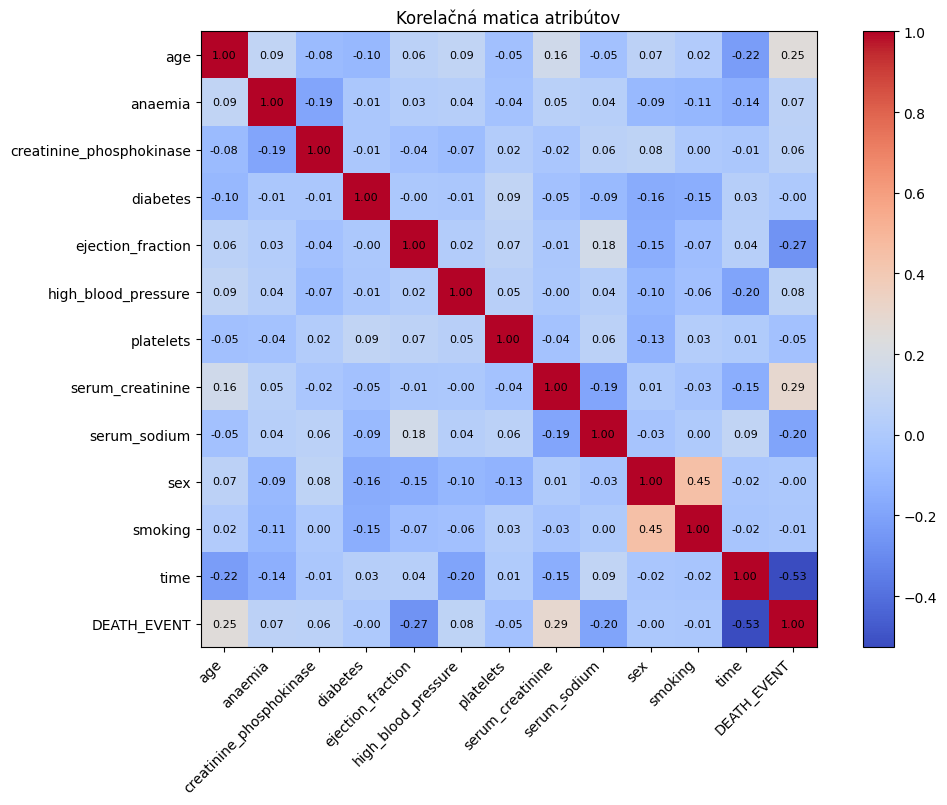

In [42]:
# TODO
numeric_data = data_hf.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.title("Korelačná matica atribútov")

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.grid(False)
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [44]:
# TODO
corr_unstacked = correlation_matrix.unstack()
corr_sorted = corr_unstacked.sort_values()
most_negative_corr = corr_sorted.head(4).index[:2]
print(f"Najväčšia záporná korelácia: {most_negative_corr[0]} a {most_negative_corr[1]}")

Najväčšia záporná korelácia: ('DEATH_EVENT', 'time') a ('time', 'DEATH_EVENT')


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [45]:
# TODO
corr_sorted = corr_sorted[corr_sorted < 1]
most_positive_corr = corr_sorted.tail(2).index[-1]
print(f"Najväčšia kladná korelácia: {most_positive_corr}")

Najväčšia kladná korelácia: ('smoking', 'sex')


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure